<a href="https://colab.research.google.com/github/asim5800/Retail-Sales-Prediction/blob/main/Final_Asim_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
%matplotlib inline

In [ ]:
#loading and reading Rossmann Store Data file
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - Asim Siddiqui/Rossmann Stores Data.csv', low_memory= False)

In [ ]:
#loading and reading Store Data file
store_df = pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - Asim Siddiqui/Store.csv')

In [ ]:
# a quick view of rossmann data
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#information of rossman dataset
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#statistical description of rossman dataset
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#sorting dataframe date order
rossman_df.sort_values(by=['Date'],inplace=True, ascending= True)
rossman_df.Date.head(5)

1017208    2013-01-01
1016473    2013-01-01
1016472    2013-01-01
1016471    2013-01-01
1016470    2013-01-01
Name: Date, dtype: object

##***Data Preprocessing & EDA*** 

In [ ]:
# a quick view of store data
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#information of store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#checking for number of null values in store dataset for each column
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

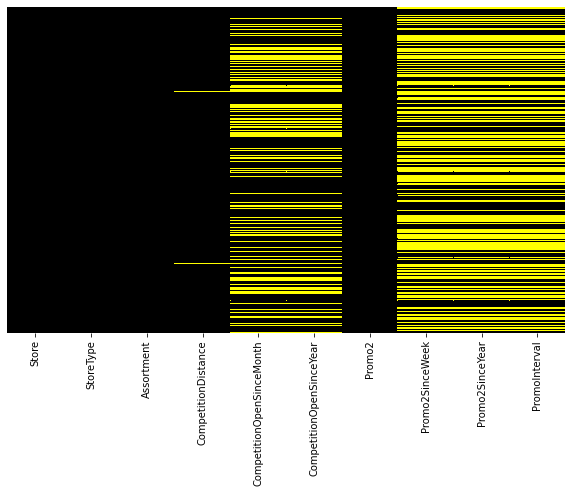

In [ ]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

In [ ]:
#dropping those columns having more null values
store_df = store_df.drop(['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'], axis=1)

In [ ]:
#information of store dataset after removing columns with null values
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1112 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


In [ ]:
#checking null values again
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

In [ ]:
#filling those 3 entries in competition distance
missing_col = ['CompetitionDistance']
#Using medain to impute the missing values as median is more robust to outliers
for i in missing_col:
 store_df.loc[store_df.loc[:,i].isnull(),i]=store_df.loc[:,i].median()

In [ ]:
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

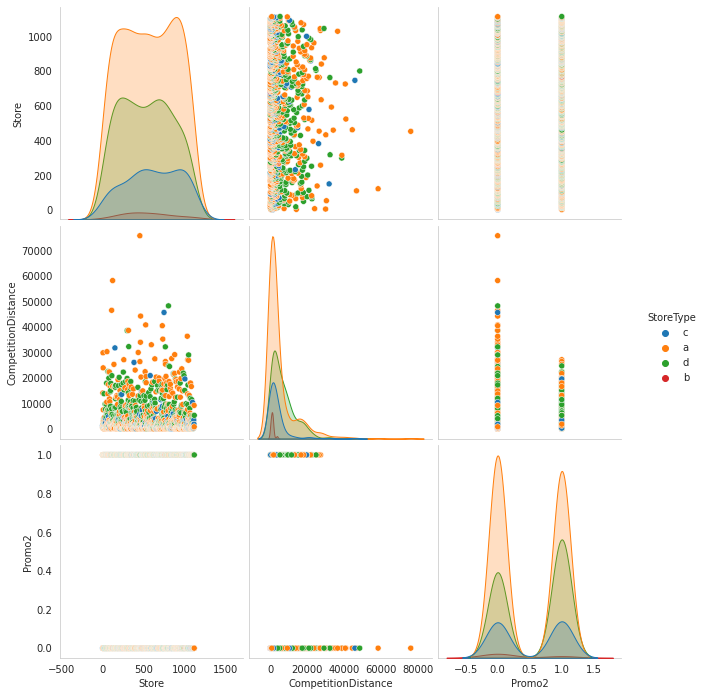

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

***Rossmann have more stores of type A. We can focus more on these types of store in order to increase sales margin.***

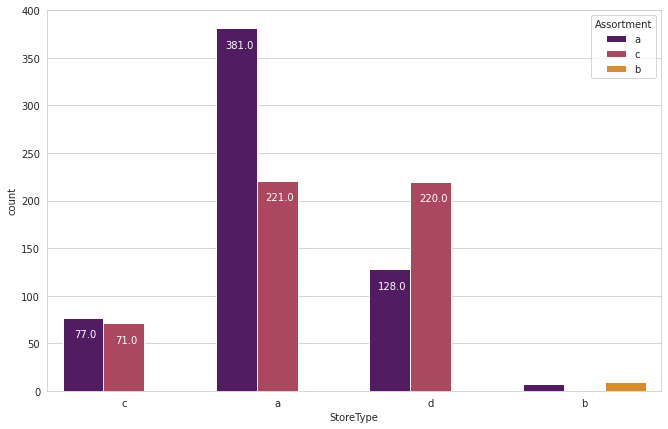

In [ ]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)


***Out of 4 stores types in Rossmann chain we can see that assortment strategy 'a' & 'c' are useful for storetype A and D respectively.***

In [ ]:
#checking count of assortment in store data
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [ ]:
#dropping assortment of b type since its number is quite small and won't impact in sales prediction very much
store_df.drop(store_df.index[store_df['Assortment'] == 'b'], inplace = True)

In [ ]:
#statistical description of store dataset
print(store_df.shape)
store_df.describe()

(1106, 5)


,Store,CompetitionDistance,Promo2
count,1106.000000,1106.000000,1106.000000
mean,557.458409,5430.944846,0.512658
std,322.279798,7675.639569,0.500066
min,1.000000,20.000000,0.000000
25%,279.250000,720.000000,0.000000
50%,557.500000,2330.000000,1.000000
75%,836.750000,6897.500000,1.000000
max,1115.000000,75860.000000,1.000000


In [ ]:
#displaying columns of store dataset
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'], dtype='object')

In [ ]:
#displaying columns of rossman dataset
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

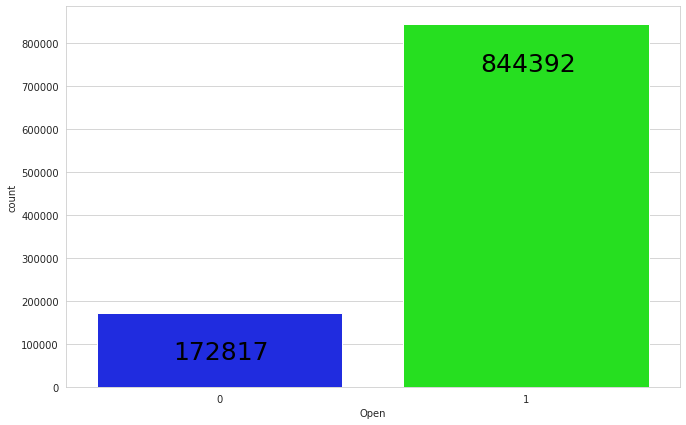

In [ ]:
#displaying how many store are operating (open)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='Open', data=rossman_df,palette="hsv_r")

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='top', color='black', size=25)
plt.show() 

***We have 172817 closed stores and since these will not generate any sales so we should remove these stores from our dataset***

In [ ]:
#dropping closed stores
rossman_df.drop(rossman_df.index[rossman_df['Open'] == 0], inplace = True)
#removing those observation where sales are 0
rossman_df = rossman_df[rossman_df.Sales != 0]

In [ ]:
#checking shape after dropping 
rossman_df.shape

(844338, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


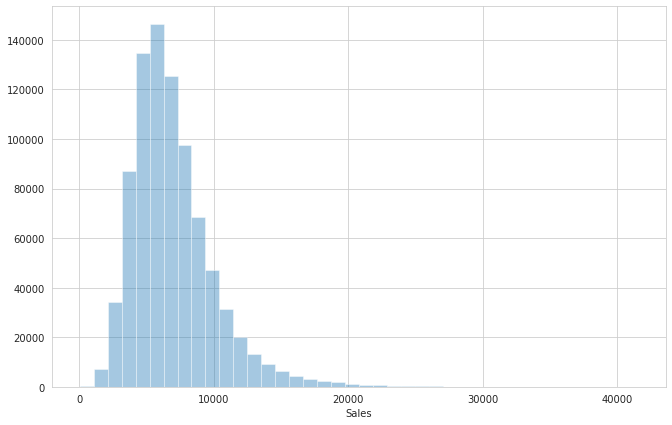

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

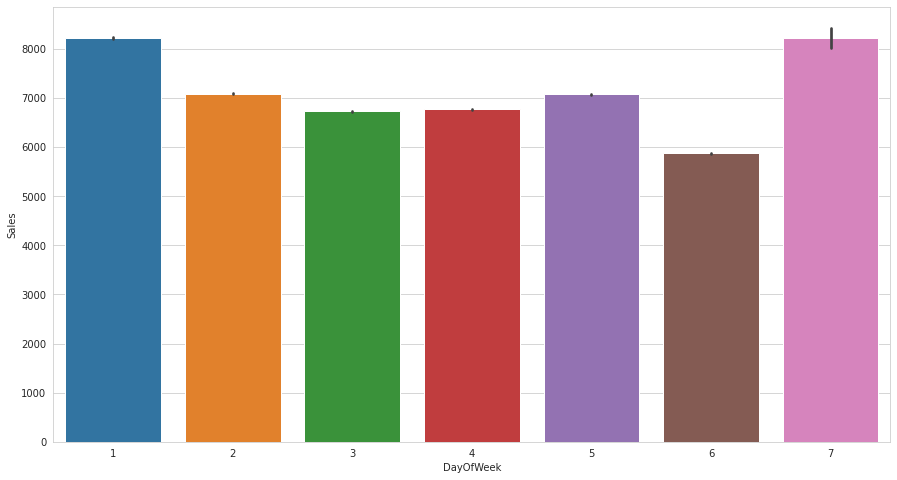

In [ ]:
#showing daywise trends
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=rossman_df);  

***On an averege store have most of its sales on first and last day of the week***

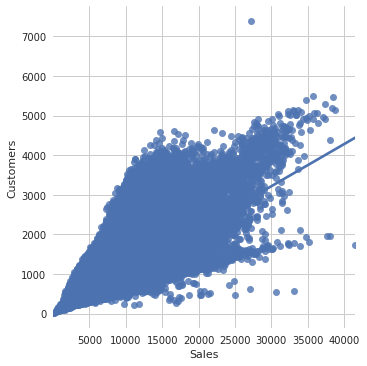

In [175]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1);


In [ ]:
#checking unique date entries in rossman dataset
rossman_df['Date'].nunique()

942

In [ ]:
#extracting year,month,week from date attribute
rossman_df['Year'] = pd.DatetimeIndex(rossman_df['Date']).year
rossman_df['Month'] = pd.DatetimeIndex(rossman_df['Date']).month
rossman_df['week_of_year'] =pd.DatetimeIndex(rossman_df['Date']).week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
#dropping date feature 
rossman_df.drop(['Date'], axis=1,inplace= True)

In [ ]:
#printing shape of rossman data after extracting year,month,week and dropping date column
print(rossman_df.shape)
rossman_df.tail()

(844338, 11)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year
745,746,5,9082,638,1,1,0,1,2015,7,31
746,747,5,10708,826,1,1,0,1,2015,7,31
747,748,5,7481,578,1,1,0,1,2015,7,31
741,742,5,10460,1016,1,1,0,1,2015,7,31
0,1,5,5263,555,1,1,0,1,2015,7,31


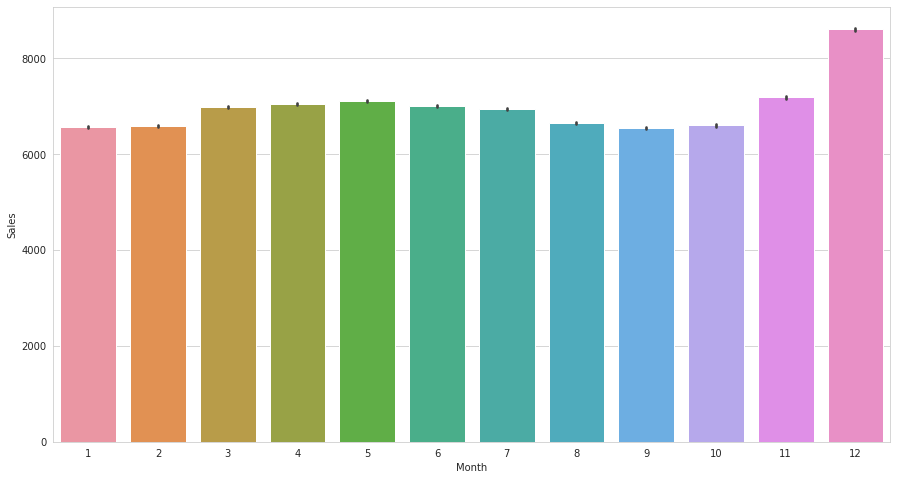

In [ ]:
#plotting monthly vs sales trend
plt.figure(figsize=(15,8))
sns.barplot(x='Month',y='Sales',data=rossman_df );

***We can see that on an average we have good sales in 2nd quarter and the last quarter of the year especially in the month of December.***  

In [ ]:
#how many years we have in our dataset
rossman_df['Year'].nunique()

3

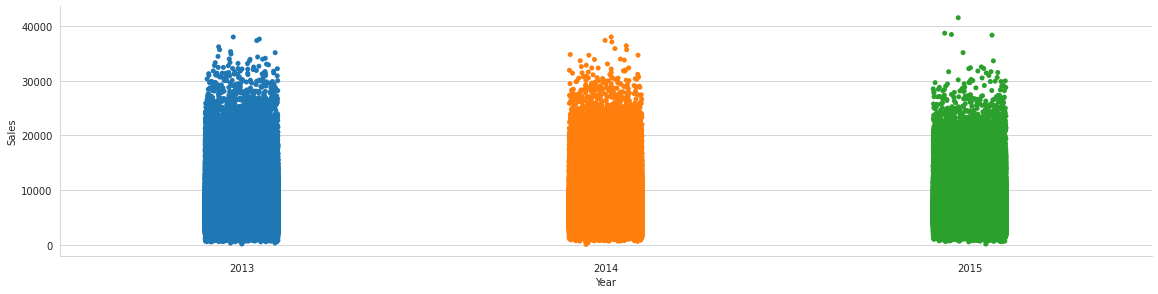

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 );

***We can see that there is not such significant differences in these 3 years in terms of sales.*** 

#***Merging two datasets***

In [ ]:
#merging store data with rossman on Store attribute
df = pd.merge(rossman_df, store_df, how='left', on='Store')

In [ ]:
# checking info of merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   DayOfWeek            844338 non-null  int64  
 2   Sales                844338 non-null  int64  
 3   Customers            844338 non-null  int64  
 4   Open                 844338 non-null  int64  
 5   Promo                844338 non-null  int64  
 6   StateHoliday         844338 non-null  object 
 7   SchoolHoliday        844338 non-null  int64  
 8   Year                 844338 non-null  int64  
 9   Month                844338 non-null  int64  
 10  week_of_year         844338 non-null  int64  
 11  StoreType            836129 non-null  object 
 12  Assortment           836129 non-null  object 
 13  CompetitionDistance  836129 non-null  float64
 14  Promo2               836129 non-null  float64
dtypes: float64(2), in

In [ ]:
#checking null values after merging  
df.isna().sum()

Store                     0
DayOfWeek                 0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
Year                      0
Month                     0
week_of_year              0
StoreType              8209
Assortment             8209
CompetitionDistance    8209
Promo2                 8209
dtype: int64

In [ ]:
#finding columns which have string (object)
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

StateHoliday
StoreType
Assortment


In [ ]:
#string into categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
         df[label]=content.astype('category').cat.as_ordered()

In [ ]:
#checking information after converting string into categorical column and checking null values %ge
df.info()
print(df.isnull().sum()/len(df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Store                844338 non-null  int64   
 1   DayOfWeek            844338 non-null  int64   
 2   Sales                844338 non-null  int64   
 3   Customers            844338 non-null  int64   
 4   Open                 844338 non-null  int64   
 5   Promo                844338 non-null  int64   
 6   StateHoliday         844338 non-null  category
 7   SchoolHoliday        844338 non-null  int64   
 8   Year                 844338 non-null  int64   
 9   Month                844338 non-null  int64   
 10  week_of_year         844338 non-null  int64   
 11  StoreType            836129 non-null  category
 12  Assortment           836129 non-null  category
 13  CompetitionDistance  836129 non-null  float64 
 14  Promo2               836129 non-null  float64 
dtype

In [ ]:
#since our null values are very small as compared to dataset we can drop these too
df = df.dropna(how='any',axis=0) 

In [ ]:
#shape of our final cleaned datset (#observations,#features)
df.shape

(836129, 15)

In [ ]:
#creating copy of dataset and we'll work on this dataset
df_temp=df.copy() #copy 1 after cleaning and merging

In [ ]:
#converting categorical feature into numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
      df_temp[label]=pd.Categorical(content).codes+1 #turning categories into numbers

In [ ]:
#checking values after conversion
df_temp.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
844333,746,5,9082,638,1,1,1,1,2015,7,31,4,2,4330.0,1.0
844334,747,5,10708,826,1,1,1,1,2015,7,31,3,2,45740.0,0.0
844335,748,5,7481,578,1,1,1,1,2015,7,31,4,1,2380.0,1.0
844336,742,5,10460,1016,1,1,1,1,2015,7,31,4,2,4380.0,0.0
844337,1,5,5263,555,1,1,1,1,2015,7,31,3,1,1270.0,0.0


In [ ]:
# checking information of our dataset
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836129 entries, 1 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                836129 non-null  int64  
 1   DayOfWeek            836129 non-null  int64  
 2   Sales                836129 non-null  int64  
 3   Customers            836129 non-null  int64  
 4   Open                 836129 non-null  int64  
 5   Promo                836129 non-null  int64  
 6   StateHoliday         836129 non-null  int8   
 7   SchoolHoliday        836129 non-null  int64  
 8   Year                 836129 non-null  int64  
 9   Month                836129 non-null  int64  
 10  week_of_year         836129 non-null  int64  
 11  StoreType            836129 non-null  int8   
 12  Assortment           836129 non-null  int8   
 13  CompetitionDistance  836129 non-null  float64
 14  Promo2               836129 non-null  float64
dtypes: float64(2), in

In [ ]:
#creating another copy for working
df1=df_temp.copy() #copy 2 of dataset after conversion of each column to numeric

In [ ]:
# converting all columns to int64
cols = ['CompetitionDistance', 'Promo2','StoreType', 'Assortment', 'StateHoliday']
df1[cols] = df1[cols].applymap(np.int64)

In [ ]:
#a final glance of our working dataset
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
1,335,2,2401,482,1,0,2,1,2013,1,1,2,1,90,1
3,494,2,3113,527,1,0,2,1,2013,1,1,2,1,1260,0
4,530,2,2907,532,1,0,2,1,2013,1,1,1,2,18160,0
5,423,2,9643,1751,1,0,2,1,2013,1,1,2,1,1270,0
6,85,2,4220,619,1,0,2,1,2013,1,1,2,1,1870,0


In [ ]:
#number of observations in our dataset 
len(df1)

836129

###***We have converted our dataset into numeric values and now we can go for feeding this data into our machine learning models to predict patterns based on 836129 observations and 14 columns.***

##***Implementing Supervised Machine Learning algorithms.***

In [ ]:
#creating dataset of features without label
X = df1.drop('Sales',axis=1)

In [ ]:
# creating output label as we want to predict sales
y= df1['Sales']

In [ ]:
#separating training and testing data by keeping ratio of 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#shape of our Training and Testing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((585290, 14), (585290,), (250839, 14), (250839,))

###***Applying simple Linear Regression algorithm*** 

In [ ]:
#now we train our model on training data
from sklearn.linear_model import LinearRegression
lm= LinearRegression() #initializing model object

In [ ]:
#train /fit lm on trianing data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#displaying training and testing accuracy
print("Train Accuracy:",lm.score(X_train, y_train))
print("Test Accuracy:",lm.score(X_test, y_test))

Train Accuracy: 0.8136623243697754
Test Accuracy: 0.8126107293397196


In [ ]:
#showing coefficients of our regression model
lm.coef_

array([-1.06198643e-01, -5.19286024e+01,  7.15703652e+00,  9.09494702e-13,
        1.18443292e+03, -9.49780082e+02,  3.02215428e+01,  1.79159917e+02,
        4.16329439e+01, -1.29471435e+00,  3.09714453e+02,  3.75710277e+02,
        3.08667532e-02,  3.45286844e+02])

In [ ]:
#predicting Sales via our model
predictions_simple=lm.predict(X_test)

In [ ]:
#printing values 
predictions_simple

array([ 6491.03273439,  6544.30536107,  4358.91683295, ...,
       10756.03477838,  5122.77073526,  5666.34265871])

In [195]:
#showing metrics for evaluation of model
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,predictions_simple)) 
print('MSE', metrics.mean_squared_error(y_test,predictions_simple))
print('RMSE',np.sqrt( metrics.mean_squared_error(y_test,predictions_simple)))

lr_mae= metrics.mean_absolute_error(y_test,predictions_simple)


MAE 972.0258276334025
MSE 1791300.6214345715
RMSE 1338.394792815099


In [184]:
#storing 100 observations for analysis
simple_lr_pred = predictions_simple[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [185]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

In [186]:
#showing 4 samples out of 100
dataset_lr.sample(4)

,Real,PredictedLR,diff
265170,6007,5758.316974,248.683026
829071,5921,5802.958402,118.041598
537739,4940,5218.465225,278.465225
757270,9535,7441.005575,2093.994425


In [187]:
#Statistical description of our predictions and actual values  
dataset_lr.describe()

,Real,PredictedLR,diff
count,100.000000,100.000000,100.000000
mean,7478.450000,7397.238881,1013.619953
std,2889.991966,2771.366702,853.139581
min,2784.000000,2412.465266,6.740332
25%,5679.000000,5604.888990,386.266186
50%,6876.500000,7000.520362,836.597160
75%,9234.000000,8400.198688,1362.560538
max,19320.000000,21660.422783,5136.383404


***FOR SIMPLE LINEAR REGRESSION MODEL MAXIMUM DIFFERENCE BETWEEN ACTUAL AND PREDICTED PRICE IS 5136***

In [ ]:
#displaying coefficients of each feature 
df1=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
df1

,Coeff
Store,-1.061986e-01
DayOfWeek,-5.192860e+01
Customers,7.157037e+00
Open,9.094947e-13
Promo,1.184433e+03
StateHoliday,-9.497801e+02
SchoolHoliday,3.022154e+01
Year,1.791599e+02
Month,4.163294e+01
week_of_year,-1.294714e+00


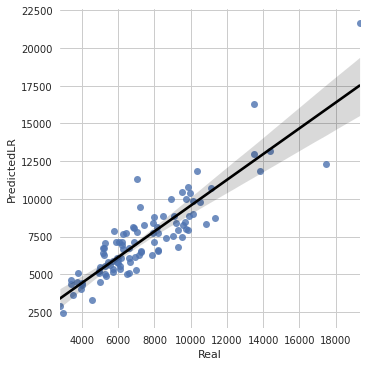

In [189]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

###***Applying ElasticNet Regression algorithm*** 

In [222]:
# importing and initializing model
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.70, l1_ratio=0.64,max_iter=500)

In [223]:
#training our model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.7, copy_X=True, fit_intercept=True, l1_ratio=0.64,
           max_iter=500, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [224]:
#displaying training and testing accuracy
print("Train Accuracy:",elasticnet.score(X_train, y_train))
print("Test Accuracy:",elasticnet.score(X_test, y_test))

Train Accuracy: 0.8023474230685707
Test Accuracy: 0.8015717777882808


In [225]:
#predicting Sales using our model
y_pred_en = elasticnet.predict(X_test)

In [226]:
#storing 100 observations for analysis
elasticnet_pred = y_pred_en[:100]
elasticnet_real = y_test[:100]
dataset_en = pd.DataFrame({'Real':elasticnet_real,'PredictedEN':elasticnet_pred})

In [227]:
#storing absolute diffrences between actual sales price and predicted
dataset_en['diff']=(dataset_en['Real']-dataset_en['PredictedEN']).abs()

In [228]:
#showing 4 samples out of 100
dataset_en.sample(4)

,Real,PredictedEN,diff
33176,7886,6020.384694,1865.615306
705219,6224,6809.722997,585.722997
296364,6191,7334.962402,1143.962402
722899,6182,6023.363588,158.636412


In [229]:
#Statistical description of our predictions and actual values 
dataset_en.describe()

,Real,PredictedEN,diff
count,100.000000,100.000000,100.000000
mean,7478.450000,7379.856531,1038.968750
std,2889.991966,2726.859495,909.323089
min,2784.000000,2689.669178,3.260463
25%,5679.000000,5713.654177,327.660556
50%,6876.500000,6854.145902,851.703515
75%,9234.000000,8388.528246,1511.188601
max,19320.000000,22079.005132,5222.903410


***FOR ELASTIC NET MAXIMUM DIFFERENCE BETWEEN ACTUAL PRICE AND PREDICTED PRICE IS 5222***

In [ ]:
#showing metrics for evaluation of model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_en))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_en))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

en_mae= metrics.mean_absolute_error(y_test, y_pred_en)


MAE: 998.7285760385228
MSE: 1896824.703493287
RMSE: 1377.2525924801475


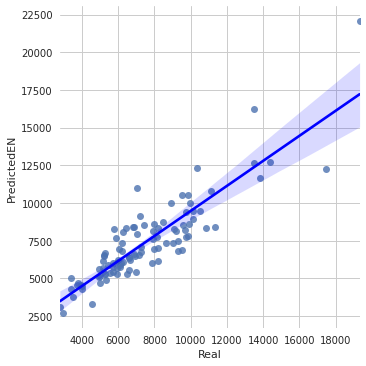

In [190]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedEN', data=dataset_en, line_kws={'color': 'blue'});

###***Applying RandomForest Regression algorithm*** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
 #RandomizedSearchCV
 #%%time
from sklearn.model_selection import RandomizedSearchCV 
#rf_grid= {"n_estimators": np.arange(10,100,10),
#         "max_depth": [None, 3,5,10],
#         "min_samples_split": np.arange(2,20,2),
#        "min_samples_leaf": np.arange(1,20,2),
#        "max_features": [0.5,1,"sqrt","auto"],
#      "max_samples": [200000]}


#rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid, n_iter=20,cv=5,verbose=True)

#rs_model.fit(X_train,y_train)

***Randomized search cv showed following execution stats:-***

**Fitting 5 folds for each of 20 candidates, totalling 100 fits**

**[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.**

**[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.2min finished.**

**CPU times: user 2min 47s, sys: 4.42 s, total: 2min 52s
Wall time: 16min**

In [ ]:
#now we have trained model we can go and look for the best one 

In [ ]:
#rs_model.best_params_

***Output of best parameters after radomizedsearch cv***

**{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 200000,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 50}**

In [ ]:
#taking best and tuning hyperparameters 
%%time
ideal_model = RandomForestRegressor(n_estimators=50,
                                    min_samples_leaf=3,
                                    min_samples_split=12,
                                    max_features='auto',
                                    max_depth=None,
                                    max_samples=200000,    
                                    n_jobs=-1) 


ideal_model.fit(X_train,y_train)

CPU times: user 1min 53s, sys: 199 ms, total: 1min 53s
Wall time: 58.3 s


In [ ]:
#displaying training and testing accuracy
print("Train Accuracy:",ideal_model.score(X_train, y_train))
print("Test Accuracy:",ideal_model.score(X_test, y_test))

Train Accuracy: 0.9738576285382028
Test Accuracy: 0.9647319446341542


In [ ]:
#predicting Sales using our model
final_predictions = ideal_model.predict( X_test)

In [192]:
final_predictions

array([7373.82274542, 5825.74815973, 3191.78238733, ..., 9915.66423521,
       5207.68958783, 4269.65002656])

In [ ]:
#storing 100 observations for analysis
rf_prd = final_predictions[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
508939,6442,6421.450261,20.549739
206960,9700,9561.341875,138.658125
628629,9752,9514.252723,237.747277
57587,4572,4231.533716,340.466284


In [ ]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,7478.450000,7390.146910,408.305682
std,2889.991966,2809.174273,334.067543
min,2784.000000,2404.102854,19.537390
25%,5679.000000,5607.968327,138.199280
50%,6876.500000,6897.356721,310.774647
75%,9234.000000,8922.508107,562.271959
max,19320.000000,18027.726655,1414.251840


***FOR RANDOM FOREST REGRESSOR MAXIMUM DIFFERENCE BETWEEN ACTUAL AND PREDICTED PRICE IS 1414***

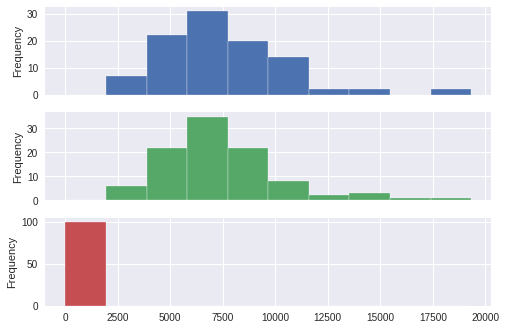

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);


***As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.***

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


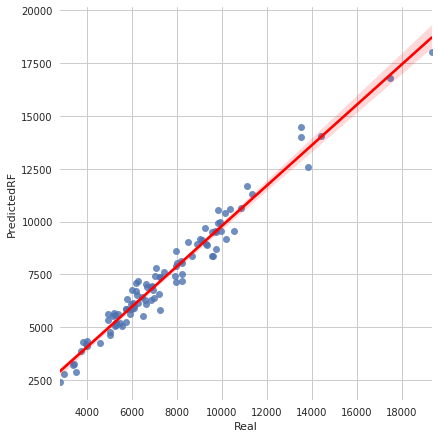

In [194]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, size=6, aspect=1);

In [ ]:
#showing metrics for evaluation of model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, final_predictions))
print('MSE:', metrics.mean_squared_error(y_test, final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_predictions)))

rf_mae= metrics.mean_absolute_error(y_test, final_predictions)


MAE: 375.97339163562293
MSE: 337136.1085457246
RMSE: 580.6342295677414


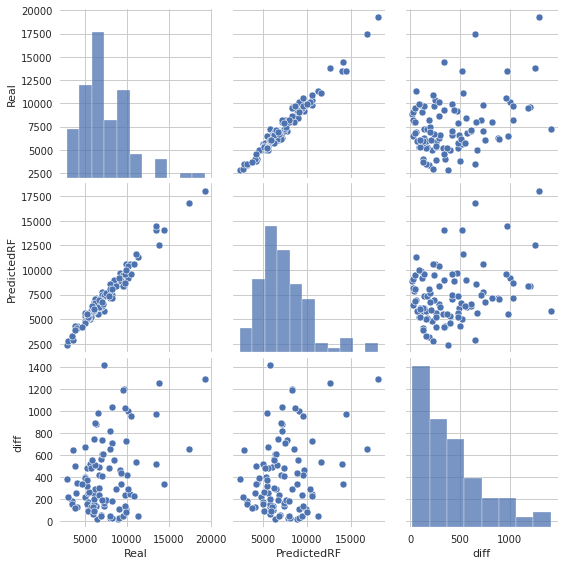

In [ ]:
#pairplot for our dataframe of random forest prediction
sns.set_style("whitegrid"), {'axes.grid' : False}
f=sns.pairplot(dataset_rf)
f.fig.set_size_inches(8,8);

##***Since this is SALES prediction MEAN ABSOLUTE ERROR is an important metric here.***

In [ ]:
#printing mean absolute error variables
rf_mae,en_mae,lr_mae

(375.97339163562293, 998.7285760385228, 972.0258276334025)

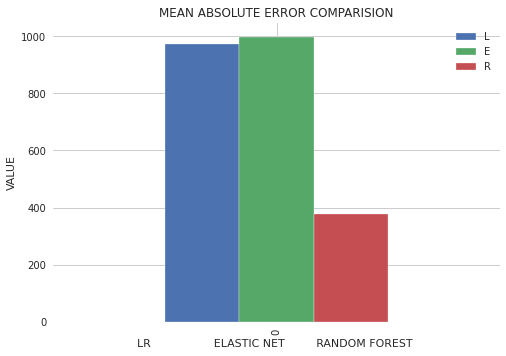

In [208]:
#visualising MAE
bar = pd.DataFrame(columns=list('LER'))
bar.loc[0] = [972.0258,998.728,375.973]

bar.plot(kind='bar')
plt.xlabel('LR                  ELASTIC NET         RANDOM FOREST ')
plt.ylabel("VALUE")
plt.title("MEAN ABSOLUTE ERROR COMPARISION")
plt.show()

***As we can see that our Mean absolute error is least in Random Forest Regressor model so this is best model as per our observations and also there is linear relationship between actual and predicted values of Sales.***

#***Feature importance***

In [ ]:
ideal_model.feature_importances_

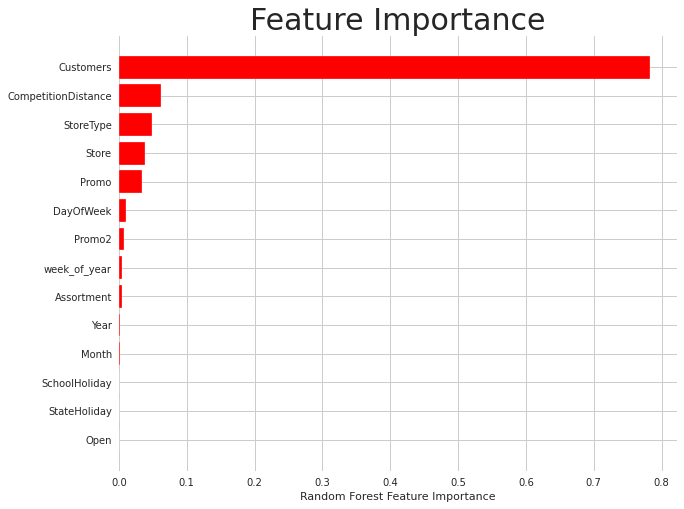

In [221]:
#plotting the useful insight of our model as SHAP took more than 78 min but still didn't completed execution 
plt.figure(figsize=(10,8))
sorted_idx = ideal_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], ideal_model.feature_importances_[sorted_idx],color='red',align='center')
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importance', fontsize=30);

***OUR MODEL SHOWS THAT CUSTOMERS, COMPETITION DISTANCE, STORE TYPE ARE ONE OF THE MOST IMPORTANT FEATURES IN OUR SALES PREDICTION***